In [517]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import linear_model
import tarfile
from six.moves import urllib
from sklearn.linear_model import LinearRegression

In [518]:
print('current working dir:', os.getcwd())
data_path = "./data/"

## collect oecd_bli data
oecd_bli = pd.read_csv (data_path + 'oecd_bli_2015.csv', thousands = ',')


oecd_bli.head()

current working dir: c:\Users\topol\Hands-On-Machine-Learning-Projects\Introduction\Model_based_learning


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


In [519]:
oecd_bli.shape

(2369, 17)

#### lets minimize our data and focus only on certan countries: where only total inequality data `TOT` is considered

In [520]:
## Filter the data to include only rows where INEQUALITY is "TOT"
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

## Dataframe such that countries are the index, indicators are columns, and values are the data
oecd_bli = oecd_bli.pivot(index="Country", columns= "Indicator", values= "Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,55206.0,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,54327.0,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0


In [521]:
oecd_bli.shape

(42, 24)

In [522]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.1
Austria      7.2
Belgium      6.8
Brazil       6.1
Canada       7.0
Name: Life satisfaction, dtype: float64

#### 

#### The `oecd_bli` Focuses on well-being and quality of life. It includes everything such as happiness, health, education, work-life balance and so on 

#### On the other hand, `gdp_per_capita` which Often used as an indicator of a country's standard of living: higher GDP per capita typically indicates better living standards and economic well-being.

In [523]:
## collect GDP data

gdp_per_capita = pd.read_csv(data_path + "GDP_per_capita.csv", thousands = ',', 
                              delimiter = '\t', encoding = 'latin1')
gdp_per_capita.rename(columns= {"2015": "GDP per capita"}, inplace = True)
gdp_per_capita.set_index ("Country", inplace = True)


gdp_per_capita.head (5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [524]:
gdp_per_capita.shape

(190, 6)

#### Lets define the country statistics: using pandas we combine the two data frames `oecd_bli` and `gdp_per_capita`

In [525]:
country_stats = pd.merge(left= oecd_bli, right = gdp_per_capita, left_index= True, right_index= True)
country_stats.sort_values(by = "GDP per capita", inplace = True)


country_stats.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,28.5,35.9,48.0,15.4,39.0,40.0,13.7,9338.0,NaN,18.1,...,NaN,66.0,72.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Colombia,22.6,12.3,59.0,23.7,58.0,50.0,23.1,NaN,NaN,NaN,...,NaN,53.0,82.0,14.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6083.510,2014.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,80.0,70.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,20.3,25.9,42.0,27.0,59.0,42.0,26.8,16269.0,NaN,17.8,...,NaN,63.0,75.0,15.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,11.8,13.8,95.0,0.1,70.0,64.0,4.8,19546.0,NaN,17.4,...,NaN,68.0,62.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0


In [526]:
country_stats.shape

(39, 30)

### Data Preprocessing

In [527]:
## check information about data
country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, South Africa to Luxembourg
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Air pollution                                      39 non-null     float64
 1   Dwellings without basic facilities                 36 non-null     float64
 2   Educational attainment                             38 non-null     float64
 3   Employees working very long hours                  37 non-null     float64
 4   Employment rate                                    39 non-null     float64
 5   Feeling safe walking alone at night                39 non-null     float64
 6   Homicide rate                                      39 non-null     float64
 7   Household net adjusted disposable income           34 non-null     float64
 8   Household net wealth                               29 non-null     float64
 9 

In [528]:
country_stats.dtypes

Air pollution                                        float64
Dwellings without basic facilities                   float64
Educational attainment                               float64
Employees working very long hours                    float64
Employment rate                                      float64
Feeling safe walking alone at night                  float64
Homicide rate                                        float64
Household net adjusted disposable income             float64
Household net wealth                                 float64
Housing expenditure                                  float64
Labour market insecurity                             float64
Life expectancy                                      float64
Life satisfaction                                    float64
Long-term unemployment rate                          float64
Personal earnings                                    float64
Quality of support network                           float64
Rooms per person        

In [529]:
country_stats[['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes']]

,Subject Descriptor,Units,Scale,Country/Series-specific Notes
Country,,,,
South Africa,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren..."
Colombia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren..."
Brazil,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren..."
Mexico,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren..."
Russia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren..."
Costa Rica,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren..."
Hungary,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren..."
Poland,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren..."
Chile,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren..."


#### We can drop the non numerical attributes for model simplicity
#### before droping, we must make a copy of a dataframe

In [530]:
country_stats = country_stats.copy()

In [531]:
## we can drop these non numeric features
country_stats = country_stats.drop(['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes'], axis= 1)

In [532]:
country_stats.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,28.5,35.9,48.0,15.4,39.0,40.0,13.7,9338.0,NaN,18.1,...,NaN,NaN,NaN,NaN,NaN,66.0,72.0,NaN,5694.572,2014.0
Colombia,22.6,12.3,59.0,23.7,58.0,50.0,23.1,NaN,NaN,NaN,...,1.0,80.0,1.4,406.0,NaN,53.0,82.0,14.0,6083.510,2014.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0,8669.998,2014.0
Mexico,20.3,25.9,42.0,27.0,59.0,42.0,26.8,16269.0,NaN,17.8,...,1.1,66.0,3.2,416.0,NaN,63.0,75.0,15.0,9009.280,2015.0
Russia,11.8,13.8,95.0,0.1,70.0,64.0,4.8,19546.0,NaN,17.4,...,1.0,43.0,NaN,481.0,NaN,68.0,62.0,16.0,9054.914,2015.0


In [533]:
country_stats.dtypes

Air pollution                                        float64
Dwellings without basic facilities                   float64
Educational attainment                               float64
Employees working very long hours                    float64
Employment rate                                      float64
Feeling safe walking alone at night                  float64
Homicide rate                                        float64
Household net adjusted disposable income             float64
Household net wealth                                 float64
Housing expenditure                                  float64
Labour market insecurity                             float64
Life expectancy                                      float64
Life satisfaction                                    float64
Long-term unemployment rate                          float64
Personal earnings                                    float64
Quality of support network                           float64
Rooms per person        

In [534]:
## missing values
country_stats.isna()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,False,False,True,False,False
Colombia,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,True,False,False,False,False,False
Brazil,False,False,False,False,False,False,False,True,True,True,...,True,True,False,False,True,False,False,False,False,False
Mexico,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
Costa Rica,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
Hungary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Poland,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Chile,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [535]:
country_stats.isna().sum()

Air pollution                                         0
Dwellings without basic facilities                    3
Educational attainment                                1
Employees working very long hours                     2
Employment rate                                       0
Feeling safe walking alone at night                   0
Homicide rate                                         0
Household net adjusted disposable income              5
Household net wealth                                 10
Housing expenditure                                   4
Labour market insecurity                              7
Life expectancy                                       0
Life satisfaction                                     0
Long-term unemployment rate                           2
Personal earnings                                     5
Quality of support network                            0
Rooms per person                                      3
Self-reported health                            

In [536]:
country_stats.isna().mean()

Air pollution                                        0.000000
Dwellings without basic facilities                   0.076923
Educational attainment                               0.025641
Employees working very long hours                    0.051282
Employment rate                                      0.000000
Feeling safe walking alone at night                  0.000000
Homicide rate                                        0.000000
Household net adjusted disposable income             0.128205
Household net wealth                                 0.256410
Housing expenditure                                  0.102564
Labour market insecurity                             0.179487
Life expectancy                                      0.000000
Life satisfaction                                    0.000000
Long-term unemployment rate                          0.051282
Personal earnings                                    0.128205
Quality of support network                           0.000000
Rooms pe

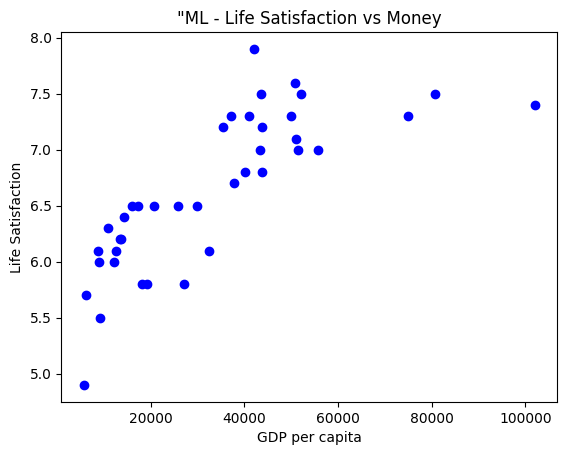

In [537]:
## plot Life Satisfaction and GDP per capita
plt.scatter(country_stats['GDP per capita'], country_stats['Life satisfaction'], color= 'blue')
plt.title('"ML - Life Satisfaction vs Money')
plt.xlabel('GDP per capita')
plt.ylabel('Life Satisfaction')


plt.show()

### Processing

### Data spliting and creating a model

In [538]:
## Target which is y and x is all dataset except y
y = np.c_[country_stats['Life satisfaction']]
x = np.c_[country_stats['GDP per capita']]

In [539]:
## create a model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [540]:
## lets see the results accuracy
accuracy = model.score(x, y)
print(accuracy)

0.6103303898629807


In [541]:
##
fitted_y = model.predict(y)

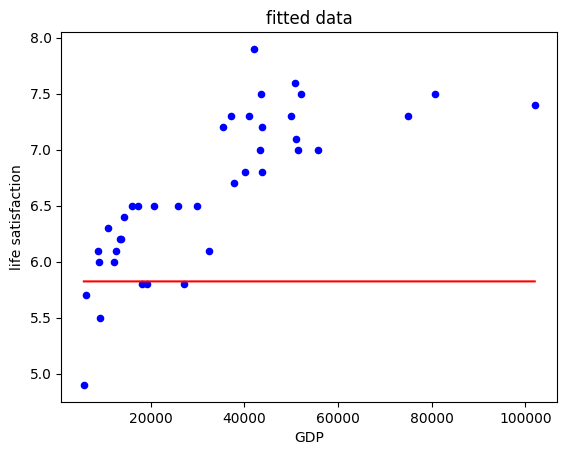

In [542]:
## plot fitted
country_stats.plot(kind= 'scatter', x= "GDP per capita", y= "Life satisfaction", color= 'blue')

plt.plot(x, fitted_y, color= 'r')
plt.title('fitted data')
plt.xlabel('GDP')
plt.ylabel('life satisfaction')



plt.show ()

In [543]:
## predict new data point from trained model
x_new = [[22587]]
print(model.predict(x_new))

[[6.37505658]]


In [544]:
## study single country 
country_stats[["GDP per capita", 'Life satisfaction']].loc["South Africa"]

GDP per capita       5694.572
Life satisfaction       4.900
Name: South Africa, dtype: float64